Group Members: Abidin Gökçekaya 25337 -- Ahmet Mert Kolabaş 25363
# Introduction                       
---
We are analyzing the given Airbnb data and other datasets we found on the internet to understand the main characteristics of successful and highly recommended hosts. Thanks to the information we have obtained, we are trying to analyze the differences between the places that are unsuccessful hosts and successful hosts. Through this analysis, we aim to find out the reason for the success different and try to find specific solutions to recommend what unsuccessful hosts can do better. First, to understand which location is successful or unsuccessful, we use a data frame from Airbnb's site which involves the user ratings for the hosts. After that, we obtain a single data frame by matching their ids. Then we analyze the data and accepted the hosts which are equal or higher than 90 points as successful hosts. Thanks to this comparison, we try to find out why these hosts are successful by using external datasets which are air quality, arrest data, hotel locations, taxi trips, and theater locations.


In [0]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

path_prefix = "/content/drive/My Drive/CS210/Proje"

Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from os.path import join

%matplotlib inline

In [0]:
fname = "AB_NYC_2019.csv"
maindf = pd.read_csv(join(path_prefix, fname))

fname = "Arrest_Data.csv"
arrestdf = pd.read_csv(join(path_prefix, fname))

fname = "Theater_Loc.csv"
thdf = pd.read_csv(join(path_prefix, fname))

fname = "subway.csv"
subdf = pd.read_csv(join(path_prefix, fname))

fname = "listingsairbnb.csv"
listdf = pd.read_csv(join(path_prefix, fname))

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Datasets
---
To identify which hosts are successful, we used a database that contains user scores. We merged the main database and the one with user scores based on the 'id' column.

In [0]:
df_merged = pd.merge(listdf, maindf, on='id')
df_merged.drop(df_merged.columns.difference(['id','last_scraped', 'host_since', 'host_response_rate','host_acceptance_rate', 'host_is_superhost', 'neighbourhood_group','zipcode', 'latitude_y', 'longitude_y', 'property_type', 'room_type_y','number_of_reviews_y','review_scores_rating','reviews_per_month_y','price_y']), 1, inplace=True)
df_merged.head()

id last_scraped  ... number_of_reviews_y reviews_per_month_y
0  2595   2020-03-14  ...                  45                0.38
1  3831   2020-03-14  ...                 270                4.64
2  5099   2020-03-14  ...                  74                0.59
3  5121   2020-03-14  ...                  49                0.40
4  5178   2020-03-14  ...                 430                3.47

[5 rows x 16 columns]

## Clearing NaN values in scores
We deleted NaN values in scores because we can't evaluate if they are good or not by another value.

In [0]:
df_merged = df_merged.dropna(subset=["review_scores_rating"])
df_merged.head()

id last_scraped  ... number_of_reviews_y reviews_per_month_y
0  2595   2020-03-14  ...                  45                0.38
1  3831   2020-03-14  ...                 270                4.64
2  5099   2020-03-14  ...                  74                0.59
3  5121   2020-03-14  ...                  49                0.40
4  5178   2020-03-14  ...                 430                3.47

[5 rows x 16 columns]

<function matplotlib.pyplot.show>

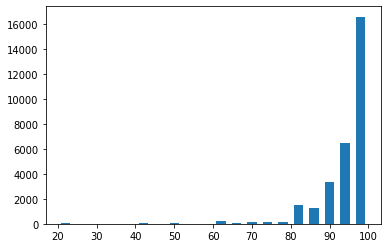

In [0]:
plt.hist(df_merged["review_scores_rating"], bins=20, rwidth=0.6)
plt.show

## Classification
We classified hosts based on user scores. We distributed them into 4 categories: Successful, Good, Okey, Bad. We chose boundaries based on the build-up in certain point ranges. We tried to choose the best hosts among others. Our boundary for successful hosts is 99 points. Even though 99 points are very high, there are still over eight thousand hosts.

In [0]:
def success(row):
  if row["review_scores_rating"] <= 90:
    return "Bad"
  if 90 <= row["review_scores_rating"] <= 94:
    return "Okey"
  if 95 <= row["review_scores_rating"] <= 98:
    return "Good"
  if 99 <= row["review_scores_rating"] <=100 :
    return "Successful"


df_merged["Success"] = df_merged.apply(success, axis = 1)
df_merged.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


id last_scraped  ... reviews_per_month_y Success
0  2595   2020-03-14  ...                0.38    Okey
1  3831   2020-03-14  ...                4.64     Bad
2  5099   2020-03-14  ...                0.59     Bad
3  5121   2020-03-14  ...                0.40     Bad
4  5178   2020-03-14  ...                3.47     Bad

[5 rows x 17 columns]

<function matplotlib.pyplot.show>

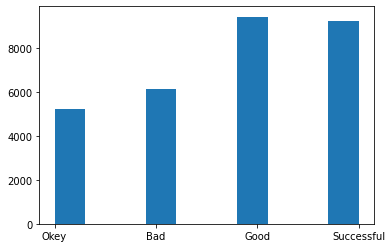

In [0]:
plt.hist(df_merged["Success"])
plt.show

## Base Heat Map
We split the data frame based on our criteria. Our main heatmap is the heatmap of successful hosts. We aim to compare this heatmap with our other datasets to find a correlation.

In [0]:
import folium

In [0]:
success_df = df_merged[df_merged.Success == 'Successful']
good_df = df_merged[df_merged.Success == 'Good']
okey_df = df_merged[df_merged.Success == 'Okey']
bad_df = df_merged[df_merged.Success == 'Bad']

In [0]:
success_df.head()

id last_scraped  ... reviews_per_month_y     Success
46  15396   2020-03-14  ...                0.12  Successful
48  16326   2020-03-14  ...                1.33  Successful
51  16458   2020-03-14  ...                0.16  Successful
58  17747   2020-03-14  ...                0.92  Successful
61  18728   2020-03-14  ...                1.65  Successful

[5 rows x 17 columns]

In [0]:
lat = success_df["latitude_y"].mean()
lng = success_df["longitude_y"].mean()

m = folium.Map(location=[lat, lng], zoom_start=12, tiles = "Stamen Terrain")

loc=success_df[['latitude_y','longitude_y']].values

In [0]:
from folium import plugins

In [0]:
sheat = folium.Map(location=[lat, lng], zoom_start=11, tiles = "Stamen Terrain")

sheat.add_child(plugins.HeatMap(loc, radius=15))

##Subway Entrances Dataset
  At first, we organized a dataset to create latitude and longitude columns. Then we used these columns to visualize them o our base heatmap to find a correlation. It seems that the path and entrances of subways affect how density distributed in new york city. It has a clear correlation between successful hosts and subway lines.

In [0]:
def lati(row):
  x = row['the_geom'].split()
  y = x[2]
  return float(y[:-1])

def longt(row):
  x = row['the_geom'].split()
  y = x[1]
  return float(y[1:])  

subdf["latitude"] = subdf.apply(lati, axis = 1)
subdf["longitude"] = subdf.apply(longt, axis = 1)

subdf.drop(subdf.columns.difference(['NAME','latitude','longitude','the_geom']), 1, inplace=True)

subdf.head()

NAME  ...  longitude
0  Birchall Ave & Sagamore St at NW corner  ... -73.868356
1  Birchall Ave & Sagamore St at NE corner  ... -73.868213
2  Morris Park Ave & 180th St at NW corner  ... -73.873499
3  Morris Park Ave & 180th St at NW corner  ... -73.872892
4        Boston Rd & 178th St at SW corner  ... -73.879623

[5 rows x 4 columns]

In [0]:
sheat2 = folium.Map(location=[lat, lng], zoom_start=11, tiles = "Stamen Terrain")
sheat2.add_child(plugins.HeatMap(loc, radius=15))

loc_sub=subdf[['latitude','longitude']].values

for i in loc_sub:
  folium.CircleMarker(location=i, radius=1, color="black").add_to(sheat2)
sheat2

##Theater Locations Dataset
  We used this dataset to understand the effect of cultural events on the locations of successful hosts. Unfortunately, we only have theater locations for manhattan. Like subway entrances, we organized the dataset to obtain latitude and longitude that we need for map comparison.
  It seems that cultural events explain the density in the downtown area. It can be said that the density of successful hosts in the downtown area could be somewhat related to theater locations.

In [0]:
def lati(row):
  x = row['the_geom'].split()
  y = x[2]
  return float(y[:-1])

def longt(row):
  x = row['the_geom'].split()
  y = x[1]
  return float(y[1:])  

thdf["latitude"] = thdf.apply(lati, axis = 1)
thdf["longitude"] = thdf.apply(longt, axis = 1)

thdf.drop(thdf.columns.difference(['NAME','latitude','longitude','ADDRESS1','ZIP','the_geom']), 1, inplace=True)

thdf.head()

the_geom  ...  longitude
0  POINT (-73.99061840882582 40.75985115447559)  ... -73.990618
1   POINT (-73.9881059525377 40.76047123447081)  ... -73.988106
2  POINT (-73.97038450260143 40.76339942774153)  ... -73.970385
3   POINT (-73.99332384622063 40.7585366821068)  ... -73.993324
4   POINT (-73.9892143340222 40.75926091219353)  ... -73.989214

[5 rows x 6 columns]

In [0]:
sheat3 = folium.Map(location=[lat, lng], zoom_start=11, tiles = "Stamen Terrain")
sheat3.add_child(plugins.HeatMap(loc, radius=15))

loc_th=thdf[['latitude','longitude']].values

for i in loc_th:
  folium.CircleMarker(location=i, radius=1, color="black").add_to(sheat3)
sheat3

##Arrest Locations Dataset
With this dataset, we tried to understand the correlation between crime locations and successful hosts. The dataset contains every arrest made in New York in 2019. We had to split the dataset because it was very large to process in Google Colab. We took the first part but in the final project, we will expand our studies on this dataset. It seems like there aren't any strict correlation between arrest locations and successful hosts. Crime does not stop people to choose these hosts.

In [0]:
arrestdf.drop(arrestdf.columns.difference(['ARREST_DATE','Latitude','Longitude','PD_DESC','ARREST_DATE','OFNS_DESC','AGE_GROUP']), 1, inplace=True)
arrestdf.head()

ARREST_DATE                        PD_DESC  ...   Latitude  Longitude
0  12/31/2019          IMPAIRED DRIVING,DRUG  ...  40.841085 -73.939769
1  12/31/2019      FRAUD,UNCLASSIFIED-FELONY  ...  40.596012 -73.742116
2  12/31/2019  HOMICIDE, NEGLIGENT, VEHICLE,  ...  40.789803 -73.952289
3  12/31/2019             CRIMINAL MIS 2 & 3  ...  40.645023 -74.077217
4  12/31/2019                      ASSAULT 3  ...  40.787875 -73.928182

[5 rows x 6 columns]

In [0]:
arrestdf_split = np.array_split(arrestdf, 50)
arrestdf_split[0].head()

ARREST_KEY ARREST_DATE  PD_CD  ... Y_COORD_CD   Latitude  Longitude
0   206892169  12/31/2019  907.0  ...     245710  40.841085 -73.939769
1   206888084  12/31/2019  739.0  ...     156522  40.596012 -73.742116
2   206890433  12/31/2019  122.0  ...     227024  40.789803 -73.952289
3   206890441  12/31/2019  268.0  ...     174282  40.645023 -74.077217
4   206890973  12/31/2019  101.0  ...     226326  40.787875 -73.928182

[5 rows x 18 columns]

In [0]:
sheat4 = folium.Map(location=[lat, lng], zoom_start=11, tiles = "Stamen Terrain")
sheat4.add_child(plugins.HeatMap(loc, radius=15))

loc_arr=arrestdf_split[1][['Latitude','Longitude']].values

for i in loc_arr:
  folium.CircleMarker(location=i, radius=1, color="black").add_to(sheat4)
sheat4

Output hidden; open in https://colab.research.google.com to view.

#Our Plans in the Future of This Project
  In the future of the project, we will continue to find different data sets and try to make a connection between the successful hosts to find out why they are successful. Afterward, we will analyze the given Airbnb data and other datasets to compare it with the unsuccessful hosts. This way we will try to understand the weaknesses of unsuccessful hosts. In addition to all of these, we will use machine learning algorithms to contribute our project further. After all of these implementations, we will look into what unsuccessful hosts can do better to improve their scores thus their success rate.